In [1]:
from biopandas.pdb import PandasPdb

In [2]:
#biopandas 1TAW

In [3]:
# Initialize a new PandasPdb object
# and fetch the PDB file from rcsb.org
ppdb = PandasPdb().fetch_pdb('1TAW')

In [4]:
data_1TAW = ppdb.df['ATOM'][(ppdb.df['ATOM']['atom_name'] == 'C')|
                            (ppdb.df['ATOM']['atom_name'] == 'N')|
                            (ppdb.df['ATOM']['atom_name'] == 'CA')]

In [5]:
new_1TAW = data_1TAW[['atom_name', 'residue_number', 'x_coord', 'y_coord', 'z_coord']]

In [6]:
new_1TAW.shape

(831, 5)

In [7]:
new_1TAW.tail(10)

,atom_name,residue_number,x_coord,y_coord,z_coord
2023,C,53,13.773,-8.780,-11.304
2026,N,54,13.230,-8.754,-10.095
2027,CA,54,12.402,-9.834,-9.591
2028,C,54,10.894,-9.606,-9.768
2033,N,55,10.441,-8.377,-9.578
2034,CA,55,9.016,-8.085,-9.660
2035,C,55,8.528,-7.234,-10.813
2039,N,56,9.424,-6.485,-11.441
2040,CA,56,9.027,-5.610,-12.529
2041,C,56,8.437,-6.301,-13.747


In [8]:
new_1TAW.head(20)

,atom_name,residue_number,x_coord,y_coord,z_coord
0,N,16,10.627,7.560,19.507
1,CA,16,10.111,7.564,20.899
2,C,16,8.698,8.135,20.828
8,N,17,7.720,7.350,21.267
9,CA,17,6.314,7.757,21.292
10,C,17,5.978,8.193,22.721
15,N,18,5.426,9.388,22.861
16,CA,18,5.054,9.881,24.173
17,C,18,6.196,10.418,25.015
19,N,19,7.336,10.684,24.382


In [9]:
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd

In [10]:
new_1TAW['Atom_combine'] = new_1TAW.atom_name.str.cat(new_1TAW.residue_number.astype(str)) #combine atom with residue_number

/Users/sbuciuma/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [11]:
new_1TAW.head(20)

,atom_name,residue_number,x_coord,y_coord,z_coord,Atom_combine
0,N,16,10.627,7.560,19.507,N16
1,CA,16,10.111,7.564,20.899,CA16
2,C,16,8.698,8.135,20.828,C16
8,N,17,7.720,7.350,21.267,N17
9,CA,17,6.314,7.757,21.292,CA17
10,C,17,5.978,8.193,22.721,C17
15,N,18,5.426,9.388,22.861,N18
16,CA,18,5.054,9.881,24.173,CA18
17,C,18,6.196,10.418,25.015,C18
19,N,19,7.336,10.684,24.382,N19


In [12]:
df = new_1TAW[[ 'Atom_combine', 'x_coord', 'y_coord', 'z_coord']]

In [13]:
X = np.array(df[['x_coord', 'y_coord', 'z_coord']])
D = cdist(X, X, metric='euclidean') #distance matrix

In [14]:
atom_df = pd.DataFrame(D, index=list(df['Atom_combine']), columns=list(df['Atom_combine']))

In [54]:
contact_map = atom_df < 12.0

In [55]:
contact_map

,N16,CA16,C16,N17,CA17,C17,N18,CA18,C18,N19,...,C53,N54,CA54,C54,N55,CA55,C55,N56,CA56,C56
N16,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
CA16,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
C16,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
N17,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
CA17,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
C17,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
N18,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
CA18,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
C18,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
N19,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [15]:
atom_df.head(5)

,N16,CA16,C16,N17,CA17,C17,N18,CA18,C18,N19,...,C53,N54,CA54,C54,N55,CA55,C55,N56,CA56,C56
N16,0.000000,1.484566,2.407635,3.404754,4.671938,5.687151,6.453007,7.630002,7.624958,6.660006,...,35.017291,33.899861,33.946951,33.937715,33.165642,33.137218,33.801932,34.007175,34.674403,36.093655
CA16,1.484566,0.000000,1.525664,2.428601,3.822160,4.560374,5.396818,6.454519,6.357200,5.437492,...,36.298344,35.165798,35.179244,35.155183,34.395812,34.350294,35.030524,35.266443,35.946634,37.354863
C16,2.407635,1.525664,0.000000,1.328695,2.457974,3.314395,4.050813,5.245596,5.385449,4.580760,...,36.665219,35.524770,35.523515,35.435585,34.644033,34.535600,35.176525,35.433880,36.079395,37.468611
N17,3.404754,2.428601,1.328695,0.000000,1.463936,2.420605,3.457848,4.685974,5.077667,4.578890,...,36.846788,35.682965,35.629021,35.507062,34.729762,34.588989,35.248721,35.554523,36.219324,37.587818
CA17,4.671938,3.822160,2.457974,1.463936,0.000000,1.531350,2.431145,3.794619,4.577726,4.377204,...,37.304266,36.132921,36.059211,35.877204,35.075561,34.875437,35.501590,35.832331,36.467754,37.813569


In [16]:
atom_df.shape

(831, 831)

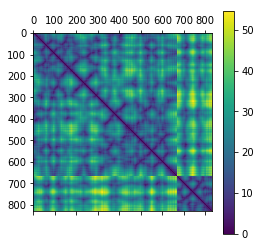

In [17]:
import pylab
pylab.matshow(np.transpose(atom_df))
pylab.colorbar()
pylab.show()

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

In [22]:
G=nx.from_numpy_matrix(atom_df.values)

/Users/sbuciuma/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/sbuciuma/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/sbuciuma/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/sbuciuma/anaconda/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axe

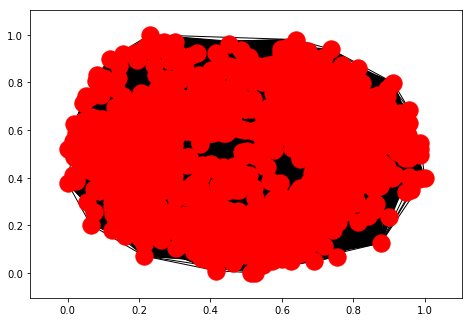

In [24]:
nx.draw(G)
nx.draw(G,pos=nx.spring_layout(G)) # use spring layout
limits=plt.axis('on') # turn of axis
plt.show()


In [ ]:
contact_map = dist_matrix < 12.0

In [25]:
!pip3 install mayavi

  Using cached mayavi-4.5.0.tar.bz2
  Using cached apptools-4.4.0.zip
  Using cached traits-4.6.0.zip
  Using cached traitsui-5.1.0.zip
  Using cached pyface-5.1.0.tar.bz2
  Running setup.py bdist_wheel for mayavi ... - error
  Complete output from command /Users/sbuciuma/anaconda/bin/python -u -c "import setuptools, tokenize;__file__='/private/var/folders/mz/h_0k4cgn1c7_5m8zt83q82lr0000gn/T/pip-build-ls2b7jig/mayavi/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /var/folders/mz/h_0k4cgn1c7_5m8zt83q82lr0000gn/T/tmpft5kbp96pip-wheel- --python-tag cp35:
  running bdist_wheel
  running build
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "/private/var/folders/mz/h_0k4cgn1c7_5m8zt83q82lr0000gn/T/pip-build-ls2b7jig/mayavi/setup.py", line 499, in <module>
      **config
    File "/Users/sbuciuma/anaconda/lib/python3.5/site-packages/numpy/distuti

In [26]:
#test with mayavi the working 

# The pdb code for the protein.
protein_code = '2q09'

# Retrieve the file from the protein database #################################
import os
if not os.path.exists('pdb%s.ent.gz' % protein_code):
    # Download the data
    try:
        from urllib import urlopen
    except ImportError:
        from urllib.request import urlopen
    print('Downloading protein data, please wait')
    opener = urlopen(
      'ftp://ftp.wwpdb.org/pub/pdb/data/structures/divided/pdb/q0/pdb%s.ent.gz'
      % protein_code)
    open('pdb%s.ent.gz' % protein_code, 'wb').write(opener.read())

# Parse the pdb file ##########################################################
import gzip
infile = gzip.GzipFile('pdb%s.ent.gz' % protein_code, 'rb')

# A graph represented by a dictionary associating nodes with keys
# (numbers), and edges (pairs of node keys).
nodes = dict()
edges = list()
atoms = set()

# Build the graph from the PDB information
last_atom_label = None
last_chain_label = None
for line in infile:
    line = line.split()
    if line[0] in ('ATOM', 'HETATM'):
        nodes[line[1]] = (line[2], line[6], line[7], line[8])
        atoms.add(line[2])
        chain_label = line[5]
        if chain_label == last_chain_label:
            edges.append((line[1], last_atom_label))
        last_atom_label = line[1]
        last_chain_label = chain_label
    elif line[0] == 'CONECT':
        for start, stop in zip(line[1:-1], line[2:]):
            edges.append((start, stop))

atoms = list(atoms)
atoms.sort()
atoms = dict(zip(atoms, range(len(atoms))))

# Turn the graph into 3D positions, and a connection list.
labels = dict()

x = list()
y = list()
z = list()
scalars = list()

for index, label in enumerate(nodes):
    labels[label] = index
    this_scalar, this_x, this_y, this_z = nodes[label]
    scalars.append(atoms[this_scalar])
    x.append(float(this_x))
    y.append(float(this_y))
    z.append(float(this_z))

connections = list()

for start, stop in edges:
    connections.append((labels[start], labels[stop]))

import numpy as np
x = np.array(x)
y = np.array(y)
z = np.array(z)
scalars = np.array(scalars)

# Visualize the data ##########################################################
from mayavi import mlab
mlab.figure(1, bgcolor=(0, 0, 0))
mlab.clf()

pts = mlab.points3d(x, y, z, 1.5 * scalars.max() - scalars,
                                    scale_factor=0.015, resolution=10)
pts.mlab_source.dataset.lines = np.array(connections)

# Use a tube fiter to plot tubes on the link, varying the radius with the
# scalar value
tube = mlab.pipeline.tube(pts, tube_radius=0.15)
tube.filter.radius_factor = 1.
tube.filter.vary_radius = 'vary_radius_by_scalar'
mlab.pipeline.surface(tube, color=(0.8, 0.8, 0))

# Visualize the local atomic density
mlab.pipeline.volume(mlab.pipeline.gaussian_splatter(pts))

mlab.view(49, 31.5, 52.8, (4.2, 37.3, 20.6))

mlab.show()

ImportError: No module named 'mayavi'

In [30]:
import re
import numpy as np
import glob
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

In [ ]:
X,Y,Z=np.array(points).T
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X,Y,Z)
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.show()

In [36]:
import Bio.PDB
import numpy

pdb_code = "1xi4"
pdb_filename = "/Users/sbuciuma/Desktop/1xi4.pdb" #not the full cage!

In [37]:
def calc_residue_dist(residue_one, residue_two) :
    """Returns the C-alpha distance between two residues"""
    diff_vector  = residue_one["CA"].coord - residue_two["CA"].coord
    return numpy.sqrt(numpy.sum(diff_vector * diff_vector))

def calc_dist_matrix(chain_one, chain_two) :
    """Returns a matrix of C-alpha distances between two chains"""
    answer = numpy.zeros((len(chain_one), len(chain_two)), numpy.float)
    for row, residue_one in enumerate(chain_one) :
        for col, residue_two in enumerate(chain_two) :
            answer[row, col] = calc_residue_dist(residue_one, residue_two)
    return answer

In [38]:
!ls


Proteine_1TAW.csv           proteine_planes.ipynb
pdb2q09.ent.gz              split_csv_in_multiple.ipynb
proteine_chain.ipynb


In [39]:
structure = Bio.PDB.PDBParser().get_structure(pdb_code, pdb_filename)
model = structure[0]

In [40]:
dist_matrix = calc_dist_matrix(model["D"], model["M"])
contact_map = dist_matrix < 12.0

In [42]:
print ("Minimum distance", numpy.min(dist_matrix))
print ("Maximum distance", numpy.max(dist_matrix))

Minimum distance 4.62857341766
Maximum distance 201.617782593


In [53]:
contact_map

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [43]:
dist_matrix.shape

(1630, 70)

In [47]:
dist_matrix

array([[ 144.77166748,  141.35417175,  142.54545593, ...,  169.08935547,
         172.84243774,  172.75245667],
       [ 142.99104309,  139.54855347,  140.65414429, ...,  166.79962158,
         170.55984497,  170.52734375],
       [ 140.01368713,  136.5536499 ,  137.66165161, ...,  163.23809814,
         166.99545288,  166.94506836],
       ..., 
       [ 141.21337891,  138.18095398,  136.3999176 , ...,   70.82656097,
          73.1844101 ,   73.50312042],
       [ 144.10687256,  141.1056366 ,  139.26551819, ...,   72.63298035,
          74.85627747,   75.22531891],
       [ 146.31484985,  143.28321838,  141.51286316, ...,   74.30435181,
          76.53327179,   76.7362442 ]])

In [50]:
def plot(data):    

# import matplotlib # matplotlib.use( 'Agg' ) 
    import pylab

    fig = pylab.figure()
    ax = fig.add_subplot(111)

    cax = ax.imshow(data, interpolation='nearest')
    ax.set_title('Ca-Ca distance plot')

    # Add colorbar, make sure to specify tick locations to match desired ticklabels 
    min = np.min(data)
    max = np.max(data)
    cbar = fig.colorbar(cax, ticks=[min, max])
    cbar.set_ticks([min,max])

    pylab.show()
# pylab.savefig( 'distmat.png', format='png' ) 

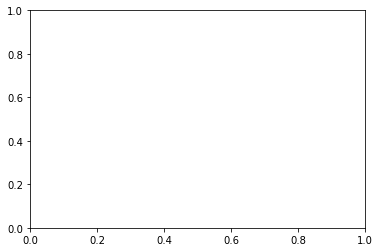

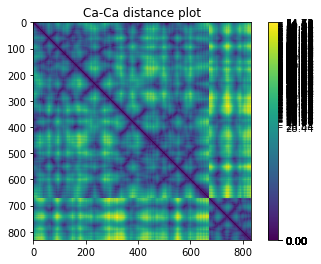

In [51]:
plot(atom_df)

In [63]:
def writeGraphToXYZ(myGraph,myFilename): 
     f = open(myFilename,'w')
     f.write(str(len(G))+'\n')
     f.write('Atoms. File created from networkx graph by IsingModel.py\n')
     for node,data in G.nodes(data=True):
        print (node,data)
         #f.write(str(atom['species'])+' '+str(atom['x'])+' '+str(atom['y'])+' '+str(atom['z'])+'\n')
     f.close()
     print("Graph exported.")

In [72]:
fh=open("/Users/sbuciuma/Desktop/Proteine/_edgelist_1TAW.txt", 'rb')
G1=nx.read_edgelist(fh)
fh.close()

In [73]:
G1

/Users/sbuciuma/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/sbuciuma/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/sbuciuma/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/sbuciuma/anaconda/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axe

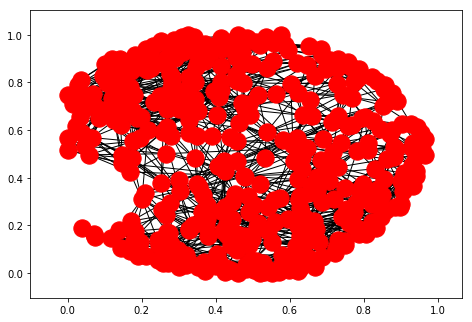

In [74]:
nx.draw(G1)
nx.draw(G1,pos=nx.spring_layout(G1)) # use spring layout
limits=plt.axis('on') # turn of axis
plt.show()


In [75]:
sorted(nx.degree(G1).values())

[3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 17,
 17,
 17,
 18,
 18]

In [76]:
nx.clustering(G1) #clustering 

{'A-1': 0.4722222222222222,
 'A-2': 0.6,
 'A-3': 1.0,
 'A131': 0.7333333333333333,
 'A132': 0.45454545454545453,
 'A133': 0.8095238095238095,
 'A134': 0.6388888888888888,
 'A135': 0.43956043956043955,
 'A136': 0.48484848484848486,
 'A137': 0.6388888888888888,
 'A138': 0.45454545454545453,
 'A139': 0.37142857142857144,
 'A140': 0.4888888888888889,
 'A141': 0.6666666666666666,
 'A142': 0.36363636363636365,
 'A143': 0.6666666666666666,
 'A144': 0.6666666666666666,
 'A145': 0.6666666666666666,
 'A146': 0.4727272727272727,
 'A147': 0.5277777777777778,
 'A148': 0.3904761904761905,
 'A149': 0.4090909090909091,
 'A150': 0.33986928104575165,
 'A151': 0.39166666666666666,
 'A152': 0.5,
 'A153': 0.42424242424242425,
 'A154': 0.4727272727272727,
 'A155': 0.5111111111111111,
 'A156': 0.6071428571428571,
 'A157': 0.7142857142857143,
 'A158': 0.5833333333333334,
 'A159': 0.5333333333333333,
 'A160': 0.6388888888888888,
 'A161': 0.5,
 'A162': 0.41818181818181815,
 'A163': 0.7333333333333333,
 'A164': 

In [81]:
print(nx.degree(G1)) #get degree of each node what does represent an atom in pur biological network

{'A181': 5, 'B169': 12, 'B221': 14, 'B161': 16, 'B179': 13, 'B163': 10, 'B190': 12, 'B208': 4, 'A224': 15, 'A219': 8, 'B218': 7, 'A208': 10, 'B246': 9, 'A167': 9, 'B171': 8, 'A136': 12, 'A170': 15, 'A198': 15, 'B200': 15, 'B191': 11, 'A210': 5, 'A146': 11, 'B244': 7, 'A152': 12, 'A231': 12, 'A206': 14, 'A187': 6, 'A143': 6, 'A244': 13, 'B219': 9, 'A164': 6, 'A138': 12, 'A229': 7, 'A178': 16, 'B204': 11, 'A189': 4, 'A201': 11, 'A176': 18, 'A214': 8, 'A144': 6, 'A196': 8, 'A131': 6, 'A162': 11, 'B248': 4, 'A185': 12, 'B232': 11, 'A156': 8, 'A182': 7, 'A194': 8, 'B157': 6, 'A245': 9, 'B183': 8, 'B231': 7, 'B233': 8, 'A233': 12, 'A202': 14, 'B230': 6, 'A239': 7, 'B217': 7, 'B214': 14, 'A216': 11, 'B213': 17, 'B223': 12, 'A186': 12, 'A160': 9, 'A221': 17, 'B243': 14, 'A222': 10, 'A177': 15, 'B165': 10, 'B170': 6, 'A232': 14, 'A163': 6, 'A135': 14, 'A193': 8, 'B202': 15, 'A139': 15, 'A159': 10, 'A238': 4, 'A220': 12, 'A234': 14, 'A188': 5, 'A218': 12, 'A161': 8, 'A142': 11, 'A207': 11, 'A195

In [79]:
sorted_degree = sorted(G1.degree().values())

In [80]:
print(sorted_degree)

[3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 18, 18]


In [82]:
source =  "A-1"

In [84]:
T_dfs =nx.dfs_tree(G1, source)

In [85]:
print(T_dfs.edges())

[('A181', 'A178'), ('B169', 'B173'), ('B221', 'B219'), ('B161', 'B214'), ('B179', 'B159'), ('B163', 'B162'), ('B190', 'B191'), ('A224', 'A226'), ('A219', 'A216'), ('A233', 'A232'), ('B246', 'B248'), ('A167', 'A166'), ('A170', 'B233'), ('A198', 'A192'), ('B200', 'B193'), ('A210', 'A212'), ('B209', 'B206'), ('B244', 'B181'), ('A152', 'A204'), ('A231', 'A153'), ('A206', 'B217'), ('A217', 'A148'), ('A217', 'A218'), ('A143', 'A144'), ('A244', 'A138'), ('B219', 'B168'), ('A164', 'A168'), ('A196', 'A194'), ('A149', 'A234'), ('B204', 'B212'), ('A201', 'A177'), ('A176', 'A203'), ('A176', 'A184'), ('A214', 'A215'), ('A144', 'A211'), ('A138', 'A142'), ('A131', 'A-2'), ('A162', 'A160'), ('B248', 'B250'), ('A185', 'A186'), ('B232', 'A171'), ('A182', 'A181'), ('A194', 'A198'), ('A245', 'A243'), ('B183', 'B195'), ('B233', 'B235'), ('A208', 'A146'), ('A202', 'A200'), ('A239', 'A240'), ('B217', 'B222'), ('B214', 'B198'), ('B213', 'B232'), ('B213', 'B215'), ('B185', 'B194'), ('A186', 'A188'), ('A205', '

In [88]:
print(T_dfs.nodes())

['A181', 'B169', 'B221', 'B161', 'B179', 'B163', 'B190', 'B208', 'A224', 'A219', 'A184', 'A233', 'B246', 'A167', 'B171', 'A136', 'A170', 'A198', 'B200', 'A210', 'B209', 'B244', 'A152', 'A231', 'A206', 'A217', 'A187', 'A143', 'A244', 'B219', 'A164', 'B189', 'A196', 'A229', 'A149', 'B204', 'A201', 'A176', 'A214', 'A144', 'A138', 'A131', 'A162', 'B248', 'A185', 'B232', 'A156', 'A182', 'A194', 'B157', 'A245', 'B183', 'B231', 'B233', 'A208', 'A202', 'A239', 'B217', 'B214', 'A216', 'B213', 'B185', 'A186', 'A205', 'B243', 'A199', 'A203', 'A222', 'A177', 'B165', 'B170', 'A232', 'A163', 'A135', 'A193', 'B202', 'A139', 'A159', 'A160', 'A220', 'A191', 'A234', 'A188', 'A218', 'A161', 'A168', 'A207', 'A195', 'A242', 'B245', 'A133', 'B224', 'A132', 'B175', 'B206', 'B158', 'A-3', 'A241', 'A226', 'B211', 'A174', 'B180', 'B212', 'A145', 'B222', 'A148', 'B174', 'A215', 'B187', 'A211', 'B188', 'A146', 'B166', 'A157', 'B191', 'B168', 'A189', 'B242', 'B230', 'A173', 'A142', 'A183', 'A243', 'B162', 'B181', 

In [90]:
S_dfs = nx.dfs_successors(G1, source)

In [91]:
print(S_dfs)

{'A181': ['A178'], 'B169': ['B173'], 'B221': ['B219'], 'B161': ['B214'], 'B179': ['B159'], 'B163': ['B162'], 'B190': ['B191'], 'A224': ['A226'], 'B204': ['B212'], 'A233': ['A232'], 'A239': ['A240'], 'A167': ['A166'], 'A170': ['B233'], 'A198': ['A192'], 'B200': ['B193'], 'B191': ['B205', 'B189'], 'A146': ['A145'], 'B244': ['B181'], 'A152': ['A204'], 'A231': ['A153'], 'A204': ['A206'], 'A206': ['B217'], 'A143': ['A144'], 'A244': ['A138'], 'B219': ['B168'], 'A164': ['A168'], 'A138': ['A142'], 'A213': ['A214'], 'A178': ['A180'], 'A219': ['A216'], 'A189': ['A191'], 'A201': ['A177'], 'A176': ['A184', 'A203'], 'A214': ['A215'], 'A144': ['A211'], 'A196': ['A194'], 'A131': ['A-2'], 'A162': ['A160'], 'A191': ['A193'], 'A185': ['A186'], 'B196': ['B199'], 'B232': ['A171'], 'A182': ['A181'], 'A194': ['A198'], 'A245': ['A243'], 'B183': ['B195'], 'B233': ['B235'], 'A208': ['A146'], 'A202': ['A200'], 'B246': ['B248'], 'B217': ['B222'], 'B214': ['B198'], 'B213': ['B232', 'B215'], 'B185': ['B194'], 'A18

/Users/sbuciuma/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/sbuciuma/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/sbuciuma/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/sbuciuma/anaconda/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axe

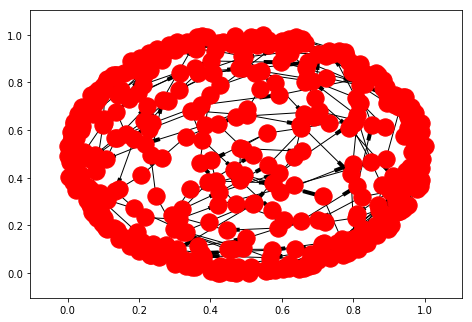

In [92]:
nx.draw(T_dfs)
nx.draw(T_dfs,pos=nx.spring_layout(T_dfs)) # use spring layout
limits=plt.axis('on') # turn of axis
plt.show()

In [98]:
G1_density = nx.density(G1)

In [99]:
G1_density

0.0481981579182688

In [100]:
import arxivpy
articles = arxivpy.query(search_query=['cs.CV', 'cs.LG', 'cs.CL', 'cs.NE', 'stat.ML'],
                         start_index=0, max_index=200, results_per_iteration=100,
                         wait_time=5.0, sort_by='lastUpdatedDate') # grab 200 articles

In [101]:
search_query='ti:deep+AND+ti:learning'

In [102]:
search_query

'ti:deep+AND+ti:learning'

In [103]:
arxivpy.download(articles, path='arxiv_pdf')

In [2]:
# http://combichem.blogspot.com.tr/2013/08/aligning-pdb-structures-with-biopython.html
# looking to get the structure of the pdb proteine so can extract the plot of each structure matching
# the algorithm ....

import Bio.PDB

# Select what residues numbers you wish to align
# and put them in a list
start_id = 1
end_id   = 70
atoms_to_be_aligned = range(start_id, end_id + 1)

# Start the parser
pdb_parser = Bio.PDB.PDBParser(QUIET = True)

# Get the structures
ref_structure = pdb_parser.get_structure("reference", "1D3Z.pdb")
sample_structure = pdb_parser.get_structure("samle", "1UBQ.pdb")

# Use the first model in the pdb-files for alignment
# Change the number 0 if you want to align to another structure
ref_model    = ref_structure[0]
sample_model = sample_structure[0]

# Make a list of the atoms (in the structures) you wish to align.
# In this case we use CA atoms whose index is in the specified range
ref_atoms = []
sample_atoms = []

# Iterate of all chains in the model in order to find all residues
for ref_chain in ref_model:
  # Iterate of all residues in each model in order to find proper atoms
  for ref_res in ref_chain:
    # Check if residue number ( .get_id() ) is in the list
    if ref_res.get_id()[1] in atoms_to_be_aligned:
      # Append CA atom to list
      ref_atoms.append(ref_res['CA'])

# Do the same for the sample structure
for sample_chain in sample_model:
  for sample_res in sample_chain:
    if sample_res.get_id()[1] in atoms_to_be_aligned:
      sample_atoms.append(sample_res['CA'])

# Now we initiate the superimposer:
super_imposer = Bio.PDB.Superimposer()
super_imposer.set_atoms(ref_atoms, sample_atoms)
super_imposer.apply(sample_model.get_atoms())

# Print RMSD:
print (super_imposer.rms)

# Save the aligned version of 1UBQ.pdb
io = Bio.PDB.PDBIO()
io.set_structure(sample_structure) 
io.save("1UBQ_aligned.pdb")

FileNotFoundError: [Errno 2] No such file or directory: '1D3Z.pdb'

In [ ]:
#MCL as a graph theory aproach test.

import networkx as nx
import scipy
import numpy as np
import matplotlib.pyplot as plt

def normalize(M,colsum,nodes):
    for i in range(0,nodes):
        for j in range(0,nodes):
            if colsum[j] != 0 :
                M[i][j] = M[i][j] / colsum[j]

def converge(M,nodes):
    for i in range(nodes):
        for j in range(nodes):
            if M[i][j] == 0 :
                continue
            else :
                if M[i][j] != 1:
                    return 0
    return 1

G = nx.Graph()


#File which contains Adj Matrix , you need to change it with your filename
filename = "adjacency.txt"
f = open(filename)
lines = f.readlines() #reading lines from file

for i in lines:
    token = i.split()  #Splitting our string 
    if len(token) != 0 : #Edge Case
        G.add_edge(token[0],token[1]) #Adding edge

nodes = G.number_of_nodes()

A = nx.adjacency_matrix(G)
A = A.toarray()

#Adding Self Loops 
for i in range(0,nodes):
    A[i][i] = 1

csum = A.sum(axis = 0)
A = A.tolist()
#Normalizing matrix
normalize(A,csum,nodes)

A = np.array(A)

count = 0
while(True):
    count = count + 1 
    A = np.linalg.matrix_power(A,2) #expansion
    A = np.power(A,2) #Inflation
    colsum = A.sum(axis = 0)
    normalize(A,colsum,nodes)
    #printing intermediate states
    print(count)
    print(A)
    if converge(A,nodes) == 1 :
        break 

#Stores Clusters
clusters = []

for i in range(nodes):
    temp = []
    for j in range(nodes):
        if A[i][j] == 1 :
            temp.append(j)
    if len(temp) != 0 :
        clusters.append(temp)

print(clusters)

In [3]:
import pyrr
import numpy as np

In [4]:
#np.array([6, 7, 8])

N16 = np.array([10.627, 7.560, 19.507])
CA16 = np.array([10.111, 7.564, 20.899])
C16 = np.array([8.698, 8.135, 20.828])
N17 = np.array([7.720, 7.350, 21.267])
CA17 = np.array([6.314, 7.757, 21.292])
C17 = np.array([5.978, 8.193, 22.721])

In [10]:
#plane creation
plane_N16_CA16_C16 = pyrr.plane.create((N16,CA16,C16), dtype=None)

In [11]:
plane_N16_CA16_C16

array([array([ 10.627,   7.56 ,  19.507]),
       array([ 10.111,   7.564,  20.899]),
       array([  8.698,   8.135,  20.828]), 0.0], dtype=object)

In [12]:
#plane creation
plane_N17_CA17_C17 = pyrr.plane.create((N17,CA17,C17), dtype=None)

In [13]:
plane_N17_CA17_C17

array([array([  7.72 ,   7.35 ,  21.267]),
       array([  6.314,   7.757,  21.292]),
       array([  5.978,   8.193,  22.721]), 0.0], dtype=object)

In [15]:
from numpy import (array, dot, arccos, clip)
from numpy.linalg import norm

In [27]:
c = dot(plane_N16_CA16_C16,plane_N17_CA17_C17)/norm(plane_N16_CA16_C16)/norm(plane_N17_CA17_C17) # -> cosine of the angle


In [28]:
c

array([ 0.9979161 ,  0.99976818,  0.99948486])

In [29]:
angle1 = arccos(clip(c, -1, 1)) # if you really want the angle

In [30]:
angle1

array([ 0.0645697 ,  0.02153276,  0.03209928])

In [31]:
import matplotlib.pyplot as plt

In [32]:
np.angle(c, deg=True) 

array([ 0.,  0.,  0.])

In [33]:
from sympy import Point3D, Line3D, Plane


In [34]:
#a = Plane(Point3D(1, 2, 2), normal_vector=(1, 2, 3))
# b = Line3D(Point3D(1, 3, 4), Point3D(2, 2, 2))
#a.angle_between(b)
plane_N16_CA16_C16.angle_between(plane_N17_CA17_C17)

AttributeError: 'numpy.ndarray' object has no attribute 'angle_between'

In [35]:
angle = np.arccos(c)

In [36]:
angle

array([ 0.0645697 ,  0.02153276,  0.03209928])

In [37]:
print(np.degrees(angle))

[ 3.6995713   1.23373639  1.83915308]
